In [1]:
#6.1.4
#Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the API key.
from config import weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
#6.1.5
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=baff5a87b13d75787c97e4f30f1f06c4


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
 
#Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Country": city_country,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | tupik
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | severo-kurilsk
Processing Record 7 of Set 1 | tateyama
Processing Record 8 of Set 1 | lillesand
Processing Record 9 of Set 1 | tasiilaq
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | boddam
Processing Record 12 of Set 1 | illapel
Processing Record 13 of Set 1 | awbari
Processing Record 14 of Set 1 | urumqi
Processing Record 15 of Set 1 | mehamn
Processing Record 16 of Set 1 | chicama
Processing Record 17 of Set 1 | cervo
Processing Record 18 of Set 1 | fortuna
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | sri aman
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 | vaini
Processing Record 23 of Set 1 | geraldton
Processing Record 24 of

Processing Record 38 of Set 4 | saskylakh
Processing Record 39 of Set 4 | vestmannaeyjar
Processing Record 40 of Set 4 | yulara
Processing Record 41 of Set 4 | maniwaki
Processing Record 42 of Set 4 | dingle
Processing Record 43 of Set 4 | narrabri
Processing Record 44 of Set 4 | clarence town
Processing Record 45 of Set 4 | kieta
Processing Record 46 of Set 4 | shahganj
Processing Record 47 of Set 4 | mairang
Processing Record 48 of Set 4 | okmulgee
Processing Record 49 of Set 4 | zheleznodorozhnyy
Processing Record 50 of Set 4 | cockburn town
Processing Record 1 of Set 5 | fier
Processing Record 2 of Set 5 | ahipara
Processing Record 3 of Set 5 | uruacu
Processing Record 4 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 5 of Set 5 | port blair
Processing Record 6 of Set 5 | salalah
Processing Record 7 of Set 5 | alto araguaia
Processing Record 8 of Set 5 | mahebourg
Processing Record 9 of Set 5 | sao joao da barra
Processing Record 10 of Set 5 | mys shmidta
City 

Processing Record 27 of Set 8 | adrar
Processing Record 28 of Set 8 | sompeta
Processing Record 29 of Set 8 | verona
Processing Record 30 of Set 8 | whitefish
Processing Record 31 of Set 8 | mount pleasant
Processing Record 32 of Set 8 | bela vista de goias
Processing Record 33 of Set 8 | neokhorion
Processing Record 34 of Set 8 | vodnyy
Processing Record 35 of Set 8 | dauriya
Processing Record 36 of Set 8 | armacao dos buzios
City not found. Skipping...
Processing Record 37 of Set 8 | santa helena
Processing Record 38 of Set 8 | mwingi
Processing Record 39 of Set 8 | sorong
Processing Record 40 of Set 8 | iralaya
Processing Record 41 of Set 8 | fort nelson
Processing Record 42 of Set 8 | saint george
Processing Record 43 of Set 8 | uusikaupunki
Processing Record 44 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing Record 45 of Set 8 | sitka
Processing Record 46 of Set 8 | borzya
Processing Record 47 of Set 8 | pirapozinho
Processing Record 48 of Set 8 | acapulco
Pr

Processing Record 17 of Set 12 | kovernino
Processing Record 18 of Set 12 | gwanda
Processing Record 19 of Set 12 | harper
Processing Record 20 of Set 12 | sobolevo
Processing Record 21 of Set 12 | west bay
Processing Record 22 of Set 12 | kindu
Processing Record 23 of Set 12 | brownsville
Processing Record 24 of Set 12 | sarangani
Processing Record 25 of Set 12 | kedrovyy
Processing Record 26 of Set 12 | vagur
Processing Record 27 of Set 12 | port hedland
Processing Record 28 of Set 12 | carora
Processing Record 29 of Set 12 | juarez
Processing Record 30 of Set 12 | trelew
Processing Record 31 of Set 12 | igrim
Processing Record 32 of Set 12 | manokwari
Processing Record 33 of Set 12 | danielskuil
Processing Record 34 of Set 12 | korla
Processing Record 35 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 36 of Set 12 | tura
Processing Record 37 of Set 12 | darnah
Processing Record 38 of Set 12 | trinidad
Processing Record 39 of Set 12 | wainwright
Processing Record

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,78.78,71,91,16.08,PF,2022-02-06 17:14:10
1,Kapaa,22.0752,-159.3190,71.92,84,75,6.91,US,2022-02-06 17:14:10
2,Tupik,54.4253,119.9327,-4.95,96,74,1.48,RU,2022-02-06 17:14:11
3,Ushuaia,-54.8000,-68.3000,55.06,58,75,5.75,AR,2022-02-06 17:11:04
4,Cape Town,-33.9258,18.4232,76.87,42,19,1.01,ZA,2022-02-06 17:10:43
5,Severo-Kurilsk,50.6789,156.1250,30.33,83,100,14.74,RU,2022-02-06 17:14:11
6,Tateyama,34.9833,139.8667,39.22,47,34,9.08,JP,2022-02-06 17:14:11
7,Lillesand,58.2488,8.3778,33.84,86,20,4.61,NO,2022-02-06 17:14:12
8,Tasiilaq,65.6145,-37.6368,23.16,60,100,26.24,GL,2022-02-06 17:14:12
9,Albany,42.6001,-73.9662,25.66,46,16,1.99,US,2022-02-06 17:14:04


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-02-06 17:14:10,-23.1203,-134.9692,78.78,71,91,16.08
1,Kapaa,US,2022-02-06 17:14:10,22.0752,-159.3190,71.92,84,75,6.91
2,Tupik,RU,2022-02-06 17:14:11,54.4253,119.9327,-4.95,96,74,1.48
3,Ushuaia,AR,2022-02-06 17:11:04,-54.8000,-68.3000,55.06,58,75,5.75
4,Cape Town,ZA,2022-02-06 17:10:43,-33.9258,18.4232,76.87,42,19,1.01


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
#6.3.1 
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

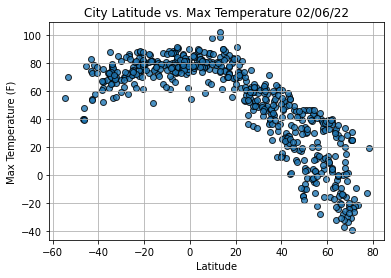

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

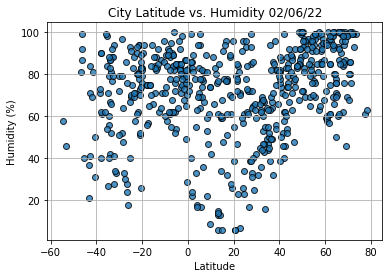

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

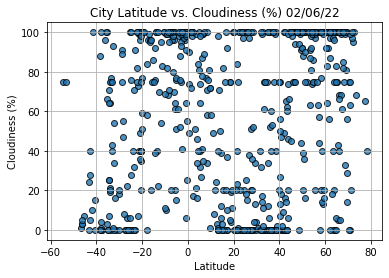

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

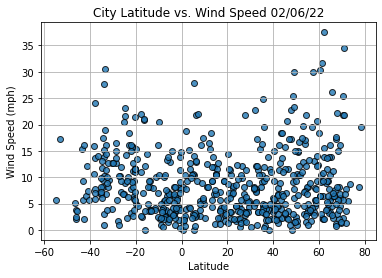

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    #line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    line_eq = f"y = {str(round(slope,2))} x + {str(round(intercept,2))} \n r: {round(r_value,4)}"
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

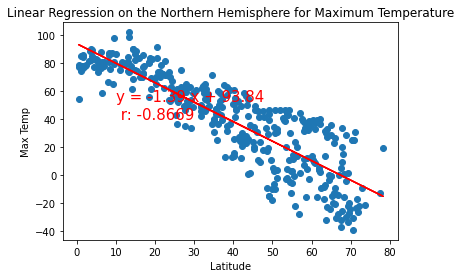

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

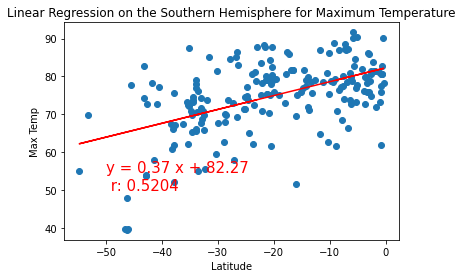

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,50))

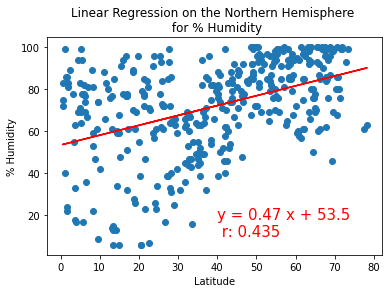

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity',
                       (40,10))

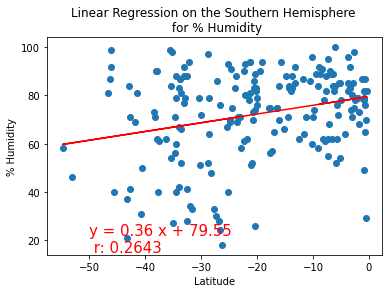

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity',
                       '% Humidity',
                       (-50,15))

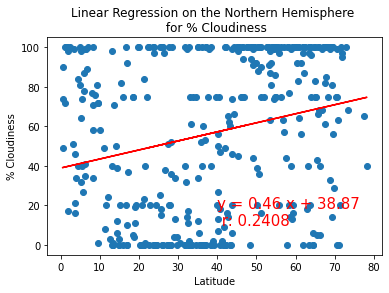

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness',
                       '% Cloudiness',
                       (40,10))

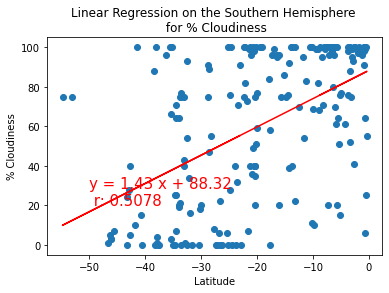

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness',
                       '% Cloudiness',
                       (-50,20))

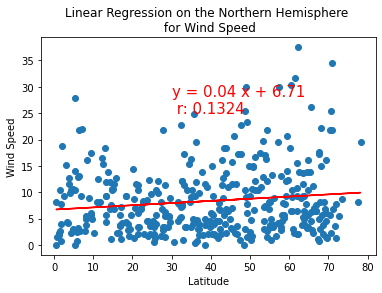

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed',
                       'Wind Speed',
                       (30, 25))

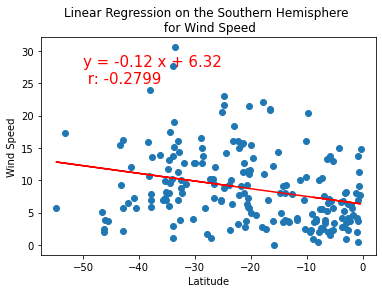

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed',
                       'Wind Speed',
                       (-50,25))

In [1]:
#6.5.2
#Import dependencies
import gmaps
#Import API key for google
from config import g_key

In [38]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Rikitea,PF,2022-02-06 17:14:10,-23.1203,-134.9692,78.78,71,91,16.08
1,1,Kapaa,US,2022-02-06 17:14:10,22.0752,-159.3190,71.92,84,75,6.91
2,2,Tupik,RU,2022-02-06 17:14:11,54.4253,119.9327,-4.95,96,74,1.48
3,3,Ushuaia,AR,2022-02-06 17:11:04,-54.8000,-68.3000,55.06,58,75,5.75
4,4,Cape Town,ZA,2022-02-06 17:10:43,-33.9258,18.4232,76.87,42,19,1.01


In [39]:
#Confirm the data types for the data columns are integers or floating-point decimal numbers.
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [40]:
city_data_df["Max Temp"].count()

578